In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  ب

In [77]:
d = pd.read_csv("Question3.csv", header=None, names=['x', 'y', 'T'])

In [78]:
d

,x,y,T
0,0.459694,-0.470583,0.0
1,0.797385,-0.343030,0.0
2,0.235270,0.961296,0.0
3,0.765453,-0.177644,0.0
4,-0.335577,-0.313893,0.0
...,...,...,...
195,0.744066,-1.206548,1.0
196,-0.457547,1.286227,1.0
197,-1.020000,-0.783926,1.0
198,1.363429,-0.800250,1.0


In [79]:
#shuffle
d = d.sample(frac=1).reset_index(drop=True)

In [80]:
# change the 0 lables to -1
d.loc[d['T'] == 0.0, 'T'] = -1

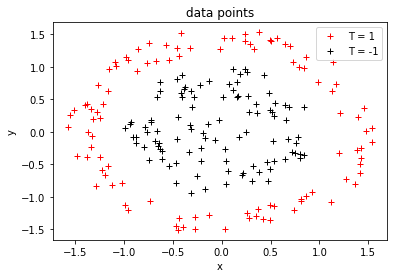

In [81]:
plt.plot(d[d['T'] == 1]['x'], d[d['T'] == 1]['y'], 'r+', label='T = 1')
plt.plot(d[d['T'] == -1]['x'], d[d['T'] == -1]['y'], 'k+', label='T = -1')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title('data points')
plt.show()

In [82]:
np.random.seed(0)

# 3 neuron

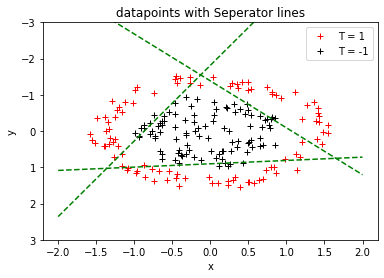

accuracy for 3 neuron :  91.5


In [83]:
#step 0
alpha = 0.001
epoch = 1000
#weight
neuron =3
w = 0.1 *np.ones((2, neuron))
v = 0.5 * np.ones(neuron)
#bias
b_last_layer = 0.5
b = 0.1 *np.ones(neuron)
#separate x and y of data
x = d.loc[:,['x','y']].values
for j in range(epoch) :
    #step 4
    z_in = np.dot(x,w) + b
    #step 5
    z = np.where(z_in >= 0.0 , 1, -1)
    #step 6
    y_in = np.dot(z,v) + b_last_layer
    #step 7
    y = np.where(y_in >= 0.0 ,1, -1)
    
    for i in( d.loc [np.equal(y, d.loc[:,'T'])== False,'T'].index):
        # if target =1
        if d.loc[i,'T'] == 1:
            min_val, index = min([(abs(val), idx) for (idx, val) in enumerate(z_in[i])])
            b[index] = b[index] + alpha * (1 -z_in[i,index] )
            w[0][index] = w[0][index] + alpha * (1 -z_in[i,index] )* x[i][0]
            w[1][index] = w[1][index] + alpha * (1 -z_in[i,index] )* x[i][1]
        #if target = -1
        else:
            for index,value in enumerate(z_in[i]):
                if value > 0 :
                    b[index] = b[index] + alpha * (-1 -z_in[i,index] )
                    w[0][index] = w[0][index] + alpha * (-1 -z_in[i,index] )* x[i][0]
                    w[1][index] = w[1][index] + alpha * (-1 -z_in[i,index] )* x[i][1]

#plot

plt.plot(d[d['T'] == 1]['x'], d[d['T'] == 1]['y'], 'r+', label='T = 1')
plt.plot(d[d['T'] == -1]['x'], d[d['T'] == -1]['y'], 'k+', label='T = -1')

x_1= np.arange(-2, 2.5)
y_1 = ((w[0][0]*x_1)+b[0])/(-w[1][0])
y_2 = ((w[0][1]*x_1)+b[1])/(-w[1][1])
y_3 = ((w[0][2]*x_1)+b[2])/(-w[1][2])
plt.plot(x_1, y_1, "g--")
plt.plot(x_1, y_2, "g--")
plt.plot(x_1, y_3, "g--")
plt.legend()
plt.ylim(3,-3)
plt.title("datapoints with Seperator lines")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
acc = (d.loc [np.equal(y, d.loc[:,'T'])== True,'T'].shape[0])*100/d.shape[0]
print('accuracy for 3 neuron : ' , acc)

# 4 neuron with 1000 epoch

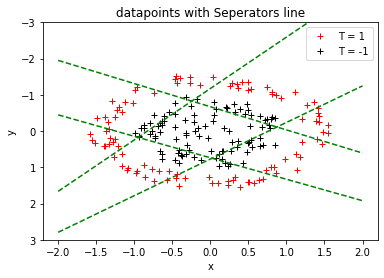

accuracy for 4 neuron :  72.0


In [95]:
alpha = 0.005
epoch = 1000
#weight
neuron =4
w = 0.1 *np.ones((2, neuron))
v = 0.5 * np.ones(neuron)
#bias
b_last_layer = 0.5
b = 0.1 *np.ones(neuron)
#separate x and y of data
x = d.loc[:,['x','y']].values
for j in range(epoch) :
    #step 4
    z_in = np.dot(x,w) + b
    #step 5
    z = np.where(z_in >= 0.0 , 1, -1)
    #step 6
    y_in = np.dot(z,v) + b_last_layer
    #step 7
    y = np.where(y_in >= 0.0 ,1, -1)
    
    for i in( d.loc [np.equal(y, d.loc[:,'T'])== False,'T'].index):
        # if target =1
        if d.loc[i,'T'] == 1:
            min_val, index = min([(abs(val), idx) for (idx, val) in enumerate(z_in[i])])
            b[index] = b[index] + alpha * (1 -z_in[i,index] )
            w[0][index] = w[0][index] + alpha * (1 -z_in[i,index] )* x[i][0]
            w[1][index] = w[1][index] + alpha * (1 -z_in[i,index] )* x[i][1]
        #if target = -1
        else:
            for index,value in enumerate(z_in[i]):
                if value > 0 :
                    b[index] = b[index] + alpha * (-1 -z_in[i,index] )
                    w[0][index] = w[0][index] + alpha * (-1 -z_in[i,index] )* x[i][0]
                    w[1][index] = w[1][index] + alpha * (-1 -z_in[i,index] )* x[i][1]
#plot
plt.plot(d[d['T'] == 1]['x'], d[d['T'] == 1]['y'], 'r+', label='T = 1')
plt.plot(d[d['T'] == -1]['x'], d[d['T'] == -1]['y'], 'k+', label='T = -1')

x_1= np.arange(-2, 2.5)
y_1 = ((w[0][0]*x_1)+b[0])/(-w[1][0])
y_2 = ((w[0][1]*x_1)+b[1])/(-w[1][1])
y_3 = ((w[0][2]*x_1)+b[2])/(-w[1][2])
y_4 = ((w[0][3]*x_1)+b[3])/(-w[1][3])
plt.plot(x_1, y_1, "g--")
plt.plot(x_1, y_2, "g--")
plt.plot(x_1, y_3, "g--")
plt.plot(x_1, y_4, "g--")
plt.legend()
plt.ylim(3,-3)
plt.title("datapoints with Seperators line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
acc = (d.loc [np.equal(y, d.loc[:,'T'])== True,'T'].shape[0])*100/d.shape[0]
print('accuracy for 4 neuron : ' , acc)

# 4 neuron with 500 epoch

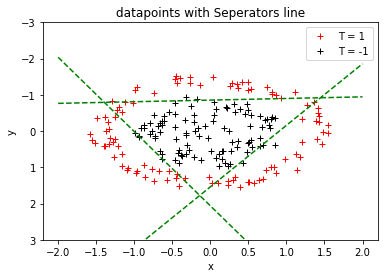

accuracy for 4 neuron :  91.5


In [96]:

alpha = 0.005
epoch = 500
#weight
neuron =4
w = 0.1 *np.ones((2, neuron))
v = 0.5 * np.ones(neuron)
#bias
b_last_layer = 0.5
b = 0.1 *np.ones(neuron)
#separate x and y of data
x = d.loc[:,['x','y']].values
for j in range(epoch) :
    #step 4
    z_in = np.dot(x,w) + b
    #step 5
    z = np.where(z_in >= 0.0 , 1, -1)
    #step 6
    y_in = np.dot(z,v) + b_last_layer
    #step 7
    y = np.where(y_in >= 0.0 ,1, -1)
    
    for i in( d.loc [np.equal(y, d.loc[:,'T'])== False,'T'].index):
        # if target =1
        if d.loc[i,'T'] == 1:
            min_val, index = min([(abs(val), idx) for (idx, val) in enumerate(z_in[i])])
            b[index] = b[index] + alpha * (1 -z_in[i,index] )
            w[0][index] = w[0][index] + alpha * (1 -z_in[i,index] )* x[i][0]
            w[1][index] = w[1][index] + alpha * (1 -z_in[i,index] )* x[i][1]
        #if target = -1
        else:
            for index,value in enumerate(z_in[i]):
                if value > 0 :
                    b[index] = b[index] + alpha * (-1 -z_in[i,index] )
                    w[0][index] = w[0][index] + alpha * (-1 -z_in[i,index] )* x[i][0]
                    w[1][index] = w[1][index] + alpha * (-1 -z_in[i,index] )* x[i][1]
#plot
plt.plot(d[d['T'] == 1]['x'], d[d['T'] == 1]['y'], 'r+', label='T = 1')
plt.plot(d[d['T'] == -1]['x'], d[d['T'] == -1]['y'], 'k+', label='T = -1')

x_1= np.arange(-2, 2.5)
y_1 = ((w[0][0]*x_1)+b[0])/(-w[1][0])
y_2 = ((w[0][1]*x_1)+b[1])/(-w[1][1])
y_3 = ((w[0][2]*x_1)+b[2])/(-w[1][2])
y_4 = ((w[0][3]*x_1)+b[3])/(-w[1][3])
plt.plot(x_1, y_1, "g--")
plt.plot(x_1, y_2, "g--")
plt.plot(x_1, y_3, "g--")
plt.plot(x_1, y_4, "g--")
plt.legend()
plt.ylim(3,-3)
plt.title("datapoints with Seperators line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
acc = (d.loc [np.equal(y, d.loc[:,'T'])== True,'T'].shape[0])*100/d.shape[0]
print('accuracy for 4 neuron : ' , acc)

# 8 neuron

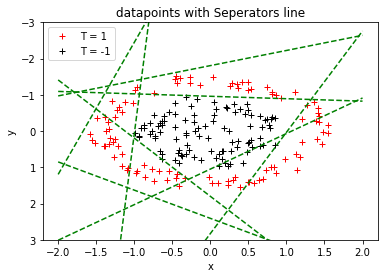

accuracy for 8 neuron :  100.0


In [88]:
alpha = 0.001
epoch =500
#weight
neuron =8
w = 0.1 *np.ones((2, neuron))
v = 0.5 * np.ones(neuron)
#bias
b_last_layer = 0.5
b = 0.1 *np.ones(neuron)
#separate x and y of data
x = d.loc[:,['x','y']].values
for j in range(epoch) :
    #step 4
    z_in = np.dot(x,w) + b
    #step 5
    z = np.where(z_in >= 0.0 , 1, -1)
    #step 6
    y_in = np.dot(z,v) + b_last_layer
    #step 7
    y = np.where(y_in >= 0.0 ,1, -1)
    
    for i in( d.loc [np.equal(y, d.loc[:,'T'])== False,'T'].index):
        # if target =1
        if d.loc[i,'T'] == 1:
            min_val, index = min([(abs(val), idx) for (idx, val) in enumerate(z_in[i])])
            b[index] = b[index] + alpha * (1 -z_in[i,index] )
            w[0][index] = w[0][index] + alpha * (1 -z_in[i,index] )* x[i][0]
            w[1][index] = w[1][index] + alpha * (1 -z_in[i,index] )* x[i][1]
        #if target = -1
        else:
            for index,value in enumerate(z_in[i]):
                if value > 0 :
                    b[index] = b[index] + alpha * (-1 -z_in[i,index] )
                    w[0][index] = w[0][index] + alpha * (-1 -z_in[i,index] )* x[i][0]
                    w[1][index] = w[1][index] + alpha * (-1 -z_in[i,index] )* x[i][1]
#plot
plt.plot(d[d['T'] == 1]['x'], d[d['T'] == 1]['y'], 'r+', label='T = 1')
plt.plot(d[d['T'] == -1]['x'], d[d['T'] == -1]['y'], 'k+', label='T = -1')

x_1= np.arange(-2, 2.5)
y_1 = ((w[0][0]*x_1)+b[0])/(-w[1][0])
y_2 = ((w[0][1]*x_1)+b[1])/(-w[1][1])
y_3 = ((w[0][2]*x_1)+b[2])/(-w[1][2])
y_4 = ((w[0][3]*x_1)+b[3])/(-w[1][3])
y_5 = ((w[0][4]*x_1)+b[4])/(-w[1][4])
y_6 = ((w[0][5]*x_1)+b[5])/(-w[1][5])
y_7 = ((w[0][6]*x_1)+b[6])/(-w[1][6])
y_8 = ((w[0][6]*x_1)+b[7])/(-w[1][7])

plt.plot(x_1, y_1, "g--")
plt.plot(x_1, y_2, "g--")
plt.plot(x_1, y_3, "g--")
plt.plot(x_1, y_4, "g--")
plt.plot(x_1, y_5, "g--")
plt.plot(x_1, y_6, "g--")
plt.plot(x_1, y_7, "g--")
plt.plot(x_1, y_8, "g--")
plt.legend()
plt.ylim(3,-3)
plt.title("datapoints with Seperators line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
acc = (d.loc [np.equal(y, d.loc[:,'T'])== True,'T'].shape[0])*100/d.shape[0]
print('accuracy for 8 neuron : ' , acc)